In [1]:
import pandas as pd
import numpy as np
import sqlite3
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
hop_output = pd.read_csv('data/neo4j_nppes_output.csv')
hop_output

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderOrganizationName(LegalBusinessName),EntityTypeCode,HealthcareProviderTaxonomyCode,community,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1922001957,RICHARD,PRESLEY,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
1,1154324192,ELIZABETH,OLDFIELD,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
2,1235132408,LEWIS,BELLARDO,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
3,1376546481,MELANIE,DUNN,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
4,1144223223,MARTIN,HIRSCH,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,1629598453,NaN,NaN,"FEMALE PHYSICIANS OF TENNESSEE, P.C.",2,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4754,1952388977,MARCY,ABEL,NaN,1,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4755,1164557856,NaN,NaN,SOUTHSTREET FAMILY MEDICAL CENTER,2,305R00000X,4454,305R00000X,Managed Care Organizations,Preferred Provider Organization,NaN,A group of physicians and/or hospitals who con...,"Source: ""Glossary of terms used in managed car...",Preferred Provider Organization,Non-Individual
4756,1982651360,JENNIFER,ERICH,NaN,1,207PH0002X,1321,207PH0002X,Allopathic & Osteopathic Physicians,Emergency Medicine,Hospice and Palliative Medicine,An emergency medicine physician with special k...,Source: American Academy of Hospice and Pallia...,Hospice and Palliative Medicine (Emergency Med...,Individual


In [31]:
hop_output['community'].nunique()
# Number of unique Community ID's in our final data set from the Neo4j output.

309

In [32]:
hop_output['NPI'].nunique()
# Number of unique NPI's in our final data set from the Neo4j output.

4758

In [33]:
hop_output['ProviderOrganizationName(LegalBusinessName)'].nunique()
# Number of unique Provider Organizations in our final data set from the Neo4j output.

337

In [34]:
hop_output['Classification'].nunique()
# Number of unique Classifications in our final data set from the Neo4j output.

74

In [35]:
hop_output['Specialization'].nunique()
# Number of unique Specializations in our final data set from the Neo4j output.

131

In [39]:
hop_output['Grouping'].nunique()
# Number of unique Specializations in our final data set from the Neo4j output.

22

In [ ]:
#hop_output.rename(columns={"community": "Community ID"})

<AxesSubplot:xlabel='community'>

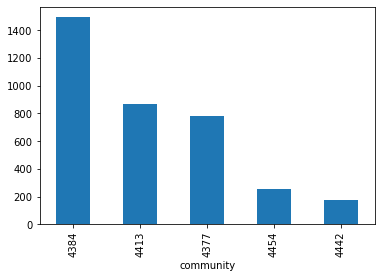

In [45]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['NPI'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# NPI's by Community ID

<AxesSubplot:xlabel='community'>

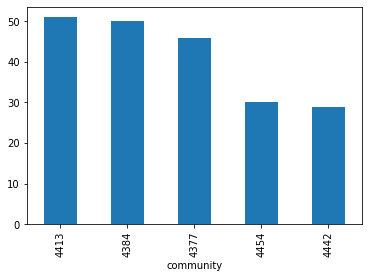

In [46]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['Classification'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# Classifications by Community ID

<AxesSubplot:xlabel='community'>

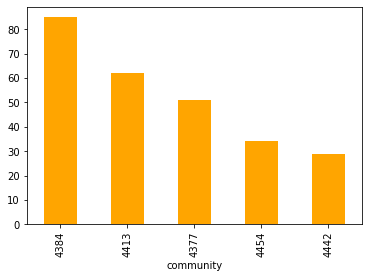

In [137]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['Specialization'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'orange')
# Specializations by Community ID

<AxesSubplot:xlabel='community'>

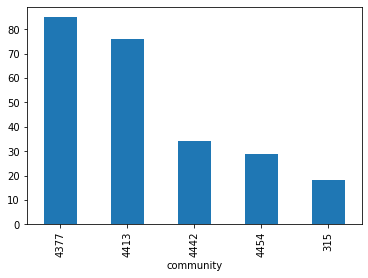

In [49]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# Provider Organizations by Community ID

<AxesSubplot:xlabel='ProviderOrganizationName(LegalBusinessName)'>

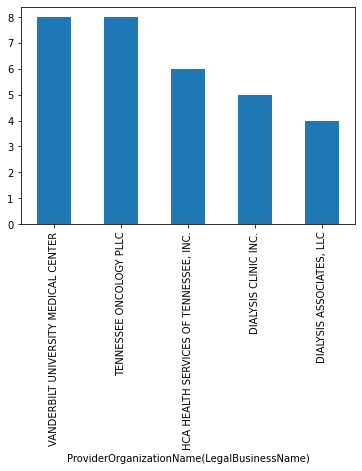

In [50]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['ProviderOrganizationName(LegalBusinessName)'])['community'].count().sort_values(ascending = False).head(5).plot(kind = 'bar')
# Community ID's by Provider Organization

<AxesSubplot:xlabel='Classification'>

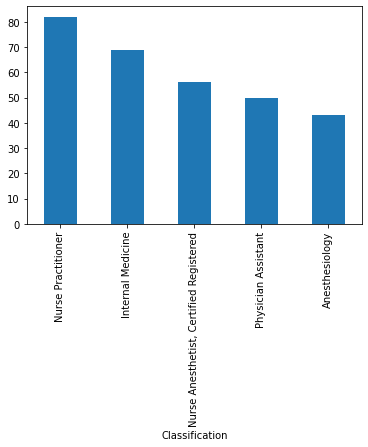

In [51]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Classification'])['community'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# Community ID's by Classification

<AxesSubplot:xlabel='ProviderOrganizationName(LegalBusinessName)'>

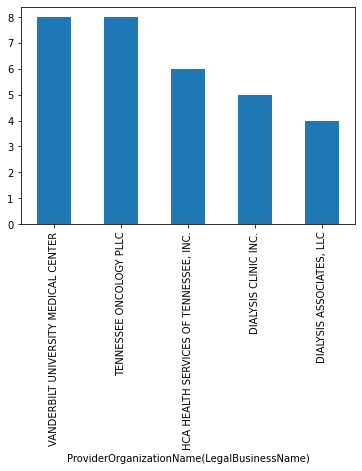

In [52]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['ProviderOrganizationName(LegalBusinessName)'])['NPI'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# NPI's by Provider Organization

<AxesSubplot:xlabel='Classification'>

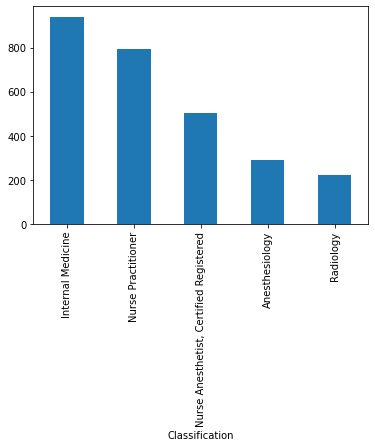

In [53]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Classification'])['NPI'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# NPI's by Classification

<AxesSubplot:xlabel='Specialization'>

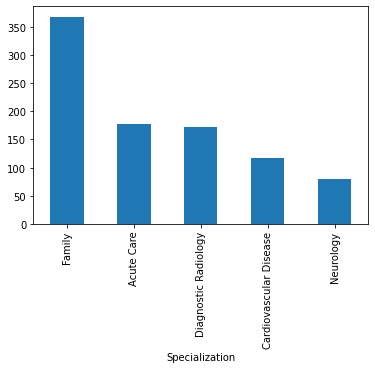

In [54]:
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
hop_output.groupby(['Specialization'])['NPI'].nunique().sort_values(ascending = False).head(5).plot(kind = 'bar')
# NPI's by Specialization

In [263]:
hop_output.loc[hop_output['community'] == 4454, 'ProviderOrganizationName(LegalBusinessName)'].value_counts().sort_values(ascending= False).head(10)

WESLEY & KLIPPENSTEIN, PC                          2
ACTION SPINE & JOINT, LLC.                         1
NASHVILLE GENERAL HOSPITAL                         1
HEIKKI E KOSTAMAA MD PC                            1
GOLD SKIN CARE CENTER                              1
INTEGRATED HEALTH COOPERATIVE, LLC.                1
TENNESSEE WOMEN'S CARE, PC                         1
MENTAL HEALTH COOPERATIVE, INC                     1
MATTHEW WALKER COMPREHENSIVE HEALTH CENTER, INC    1
TENNESSEE RETINA PC                                1
Name: ProviderOrganizationName(LegalBusinessName), dtype: int64

In [253]:
filtered.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].nunique().sort_values(ascending= False)

community
4384    85
4413    62
4377    51
4454    34
4442    29
Name: Specialization, dtype: int64

In [254]:
filtered.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].nunique().sort_values(ascending= False)

community
4377    85
4413    76
4442    34
4454    29
4384    14
Name: ProviderOrganizationName(LegalBusinessName), dtype: int64

In [247]:
specialization_grouped = hop_output.groupby(['community'])['Specialization'].nunique().sort_values(ascending= False).head(25)
specialization_grouped

community
4384    85
4413    62
4377    51
4454    34
4442    29
4702    14
1544    13
315     13
4489    12
4400    11
5393     9
8948     8
1738     7
113      7
4752     6
4886     6
5017     5
4399     5
24       5
4378     5
1874     5
10       5
4678     4
5391     4
7560     4
Name: Specialization, dtype: int64

In [249]:
df_pivot =specialization_grouped.unstack()

# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, colormap= 'Accent', figsize = (8,8))

plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.xlabel('Community ID')
plt.ylabel('specialization')
plt.title('Specializations by Community ID')

plt.show()

AttributeError: 'Int64Index' object has no attribute 'remove_unused_levels'

In [152]:
provider_grouped = hop_output.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].value_counts().sort_values(ascending= False).head(20)
provider_grouped

community  ProviderOrganizationName(LegalBusinessName)      
4377       TENNESSEE ONCOLOGY PLLC                              8
4384       VANDERBILT UNIVERSITY MEDICAL CENTER                 8
4377       HCA HEALTH SERVICES OF TENNESSEE, INC.               4
4413       SAINT THOMAS WEST HOSPITAL                           4
1544       AGILITAS USA, INC                                    4
4377       HTI MEMORIAL HOSPITAL CORPORATION                    3
           DIALYSIS CLINIC INC.                                 3
1544       AGILITAS USA, INC.                                   3
4413       TENNESSEE ORTHOPAEDIC ALLIANCE PA                    2
4377       TENNESSEE ONCOLOGY,PLLC                              2
           HOSPITAL BASED MEDICAL SERVICES OF TENNESSEE-I PC    2
           DIALYSIS ASSOCIATES, LLC                             2
4413       DIALYSIS ASSOCIATES, LLC                             2
           ENDOSCOPY CENTER OF ST THOMAS LLC                    2
           QUES

In [170]:
filtered = hop_output[hop_output.community.isin(['4384', '4413', '4377', '4454', '4442'])] 
filtered

,NPI,ProviderFirstName,ProviderLastName(LegalName),ProviderOrganizationName(LegalBusinessName),EntityTypeCode,HealthcareProviderTaxonomyCode,community,Code,Grouping,Classification,Specialization,Definition,Notes,Display Name,Section
0,1922001957,RICHARD,PRESLEY,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
1,1154324192,ELIZABETH,OLDFIELD,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
2,1235132408,LEWIS,BELLARDO,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
3,1376546481,MELANIE,DUNN,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
4,1144223223,MARTIN,HIRSCH,NaN,1,207V00000X,4454,207V00000X,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,NaN,An obstetrician/gynecologist possesses special...,"Source: American Board of Medical Specialties,...",Obstetrics & Gynecology Physician,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,1669631966,WILLIAM,REYNOLDS,NaN,1,2088F0040X,4384,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4752,1497966105,TARA,ALLEN,NaN,1,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4753,1629598453,NaN,NaN,"FEMALE PHYSICIANS OF TENNESSEE, P.C.",2,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual
4754,1952388977,MARCY,ABEL,NaN,1,2088F0040X,4413,2088F0040X,Allopathic & Osteopathic Physicians,Urology,Female Pelvic Medicine and Reconstructive Surgery,A subspecialist in Female Pelvic Medicine and ...,"Source: American Board of Medical Specialties,...",Female Pelvic Medicine and Reconstructive Surg...,Individual


In [255]:
specialization_grouped3 = filtered.groupby(['community'])['Specialization'].value_counts().sort_values(ascending= False).head(60)
specialization_grouped3

community  Specialization                         
4384       Family                                     120
           Acute Care                                 106
           Diagnostic Radiology                        57
           Cardiovascular Disease                      56
4377       Diagnostic Radiology                        54
4413       Family                                      51
4384       Neurology                                   37
4377       Family                                      32
4384       Critical Care Medicine                      30
           Hematology & Oncology                       28
4377       Acute Care                                  28
4384       Infectious Disease                          28
           Adult Health                                28
4377       Hematology & Oncology                       27
4384       Gastroenterology                            26
           Anatomic Pathology & Clinical Pathology     25
4413       Cardiovasc

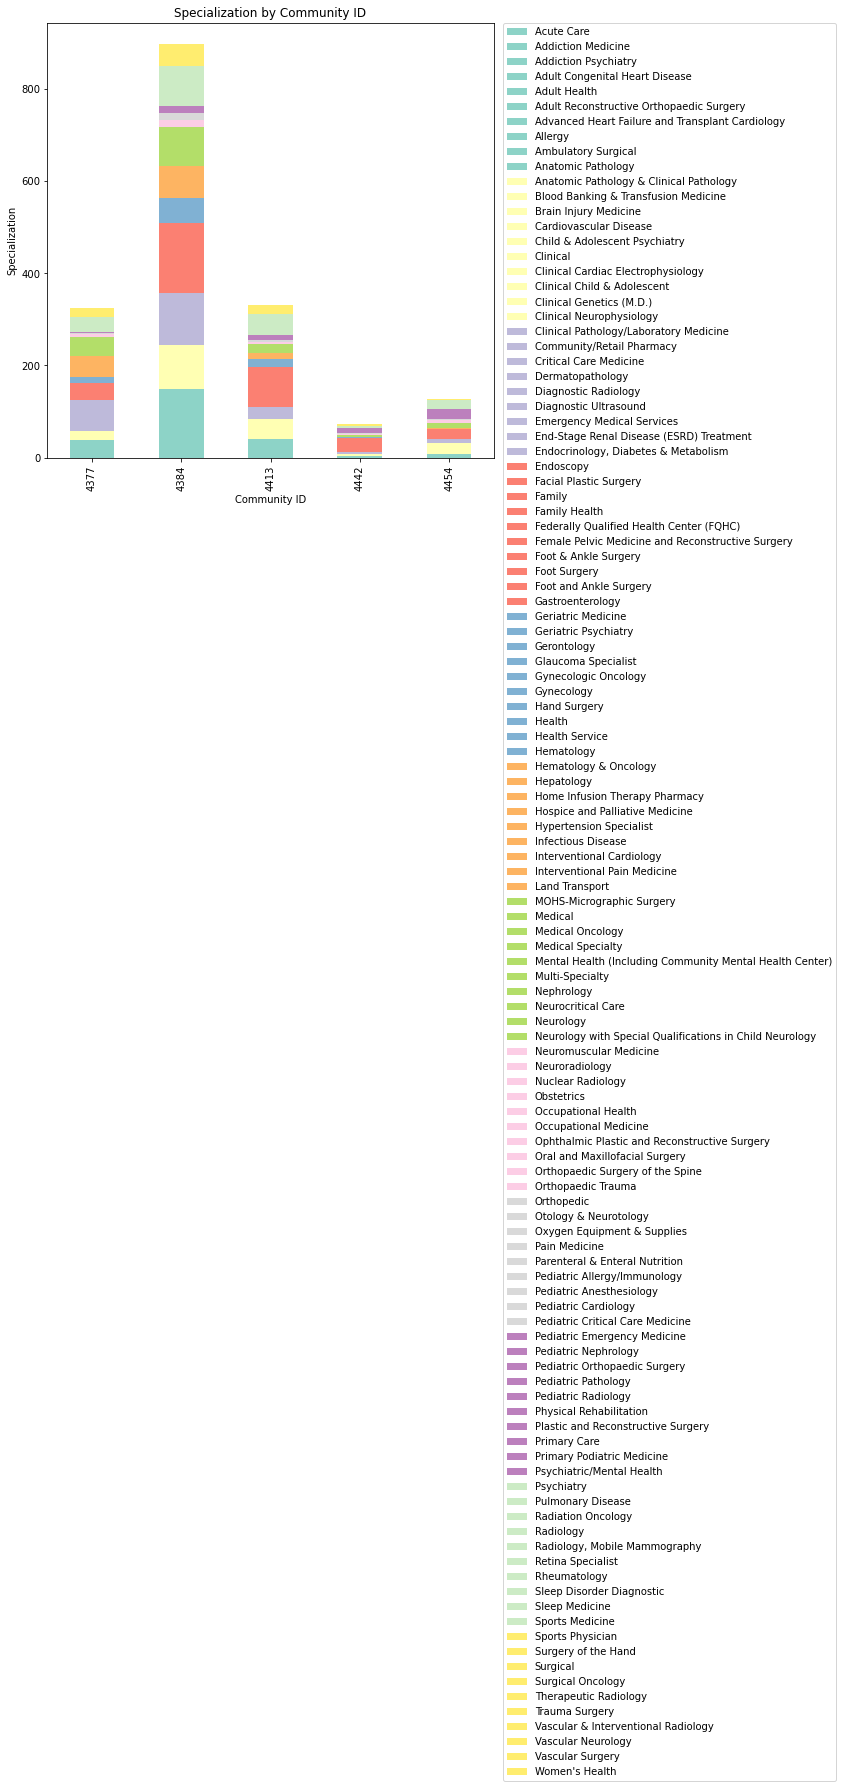

In [246]:
df_pivot3 = specialization_grouped3.unstack()

# Plot stacked bar chart
df_pivot3.plot(kind='bar', stacked=True, colormap= 'Set3', figsize = (8,8))

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.xlabel('Community ID')
plt.ylabel('Specialization')
plt.title('Specialization by Community ID')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [256]:
provider_grouped4 = filtered.groupby(['community'])['ProviderOrganizationName(LegalBusinessName)'].value_counts().sort_values(ascending= False).head(60)
provider_grouped4

community  ProviderOrganizationName(LegalBusinessName)      
4377       TENNESSEE ONCOLOGY PLLC                              8
4384       VANDERBILT UNIVERSITY MEDICAL CENTER                 8
4377       HCA HEALTH SERVICES OF TENNESSEE, INC.               4
4413       SAINT THOMAS WEST HOSPITAL                           4
4377       DIALYSIS CLINIC INC.                                 3
           HTI MEMORIAL HOSPITAL CORPORATION                    3
4454       WESLEY & KLIPPENSTEIN, PC                            2
4413       DIALYSIS ASSOCIATES, LLC                             2
           ENDOSCOPY CENTER OF ST THOMAS LLC                    2
           QUEST DIAGNOSTICS CLINICAL LABORATORIES INC          2
           SAINT THOMAS MEDICAL PARTNERS                        2
4377       HOSPITAL BASED MEDICAL SERVICES OF TENNESSEE-I PC    2
           TENNESSEE ONCOLOGY,PLLC                              2
           DIALYSIS ASSOCIATES, LLC                             2
4413       TENN

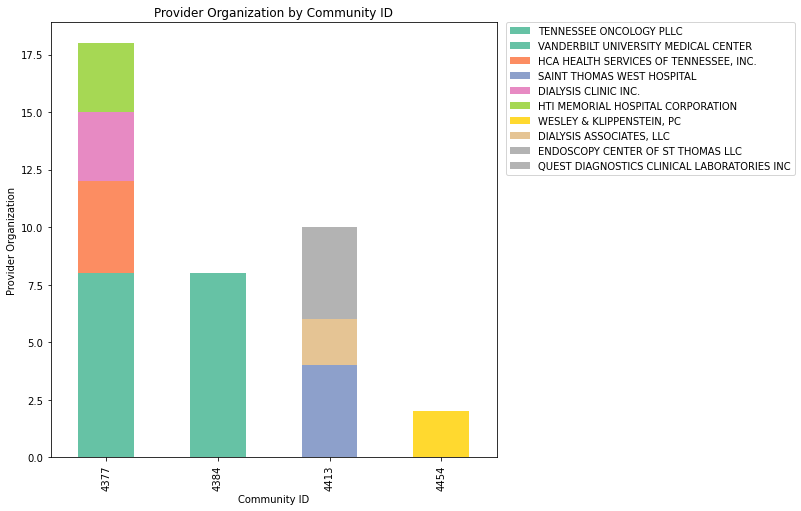

In [224]:
df_pivot4 = provider_grouped4.unstack()

# Plot stacked bar chart
df_pivot4.plot(kind='bar', stacked=True, colormap= 'Set2', figsize = (8,8))

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.xlabel('Community ID')
plt.ylabel('Provider Organization')
plt.title('Provider Organization by Community ID')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
df_pivot2 = provider_grouped.unstack()

# Plot stacked bar chart
df_pivot2.plot(kind='bar', stacked=True, colormap= 'Accent', figsize = (8,8))

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.xlabel('Community ID')
plt.ylabel('Provider Organization')
plt.title('Provider Organization by Community ID')

plt.show()

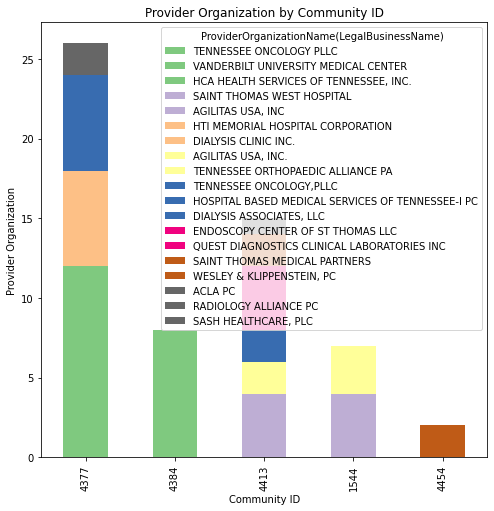

In [162]:
df_pivot2 = provider_grouped.unstack()

# Plot stacked bar chart
df_pivot2.plot(kind='bar', stacked=True, colormap= 'Accent', figsize = (8,8))

plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.xlabel('Community ID')
plt.ylabel('Provider Organization')
plt.title('Provider Organization by Community ID')

plt.show()

In [125]:
four442 = hop_output.groupby([hop_output['community'] == '4442'])['ProviderOrganizationName(LegalBusinessName)'].value_counts().sort_values(ascending= False).head(10)
four442

community  ProviderOrganizationName(LegalBusinessName)
False      TENNESSEE ONCOLOGY PLLC                        8
           VANDERBILT UNIVERSITY MEDICAL CENTER           8
           HCA HEALTH SERVICES OF TENNESSEE, INC.         6
           DIALYSIS CLINIC INC.                           5
           AGILITAS USA, INC                              4
           DIALYSIS ASSOCIATES, LLC                       4
           SAINT THOMAS WEST HOSPITAL                     4
           AGILITAS USA, INC.                             3
           HTI MEMORIAL HOSPITAL CORPORATION              3
           UNITED NEIGHBORHOOD HEALTH SERVICES, INC       3
Name: ProviderOrganizationName(LegalBusinessName), dtype: int64